In [7]:
###pip install tensorflow==2.8.0 tensorflow-io==0.24.0

In [2]:
pip install tensorflow-gpu==2.8.0

     ---------------------------------------- 438.0/438.0 MB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
sys.version

'3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow_io as tfio
import tensorflow as tf

In [3]:
capuchin_file = os.path.join('Data','Parsed_Capuchinbird_Clips','XC3776-3.wav')
non_capuchin_file = os.path.join('Data','Parsed_Not_Capuchinbird_Clips','afternoon-birds-song-in-forest-0.wav')

In [4]:
def load_data(file):
    # load encoded wav file
    file_content = tf.io.read_file(file)
    # decode wav
    wav, sample_rate = tf.audio.decode_wav(file_content, desired_channels=1)
    # remove trailing  axis
    wav = tf.squeeze(wav,axis=-1)
    sample_rate =  tf.cast(sample_rate, dtype = tf.int64)
    # amplitude the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [5]:
wave = load_data(capuchin_file)
nwave = load_data(non_capuchin_file)

In [6]:
wave

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 8.9910554e-07, -2.7947258e-06,  7.0741157e-06, ...,
       -1.0823049e-02, -3.5766482e-03,  1.5143131e-02], dtype=float32)>

In [7]:
nwave

<tf.Tensor: shape=(48927,), dtype=float32, numpy=
array([ 0.        ,  0.        ,  0.        , ..., -0.00054067,
        0.02472705, -0.00794304], dtype=float32)>

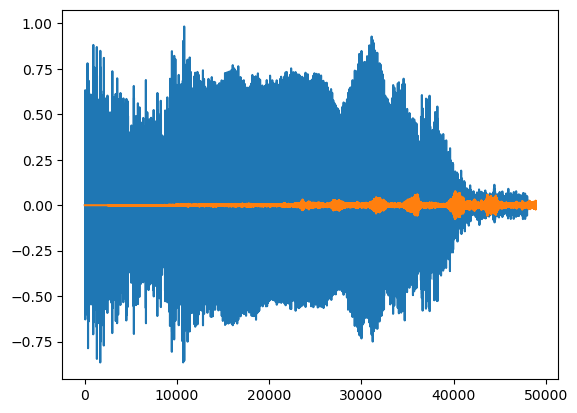

In [8]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [9]:
pos = os.path.join('Data','Parsed_Capuchinbird_Clips')
neg = os.path.join('Data','Parsed_Not_Capuchinbird_Clips')

In [10]:
posi = tf.data.Dataset.list_files(pos+'\*.wav')
negi = tf.data.Dataset.list_files(neg+'\*.wav')

In [11]:
positives = tf.data.Dataset.zip((posi,tf.data.Dataset.from_tensor_slices(tf.ones(len(posi)))))
negitives = tf.data.Dataset.zip((posi,tf.data.Dataset.from_tensor_slices(tf.zeros(len(negi)))))
data = positives.concatenate(negitives)

In [12]:
data.shuffle(1000).as_numpy_iterator().next()

(b'Data\\Parsed_Capuchinbird_Clips\\XC79965-9.wav', 1.0)

In [13]:
lengths=[]
for file in os.listdir(os.path.join('Data','Parsed_Capuchinbird_Clips')):
    tensor_wave = load_data(os.path.join('Data','Parsed_Capuchinbird_Clips',file))
    lengths.append(len(tensor_wave))

In [14]:
lengths

[40000,
 48000,
 56000,
 48000,
 56000,
 64000,
 64000,
 64000,
 56000,
 56000,
 48000,
 56000,
 64000,
 56000,
 40000,
 64000,
 64000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 64000,
 64000,
 48000,
 56000,
 64000,
 56000,
 64000,
 32000,
 40000,
 48000,
 40000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 64000,
 64000,
 48000,
 64000,
 48000,
 48000,
 40000,
 48000,
 48000,
 56000,
 56000,
 48000,
 40000,
 56000,
 48000,
 40000,
 56000,
 48000,
 48000,
 56000,
 48000,
 64000,
 64000,
 40000,
 40000,
 72000,
 56000,
 56000,
 56000,
 64000,
 56000,
 64000,
 64000,
 56000,
 56000,
 56000,
 48000,
 48000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 40000,
 64000,
 56000,
 56000,
 40000,
 64000,
 56000,
 64000,
 48000,
 64000,
 56000,
 48000,
 48000,
 48000,
 64000,
 64000,
 64000,
 48000,
 48000,
 56000,
 48000,
 64000,
 48000,
 64000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 40000,
 48000,
 48000,


In [15]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [16]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [17]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [18]:
def preprocess(file,label):
    wav = load_data(file)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000]-tf.shape(wav),dtype=tf.float32)
    wav = tf.concat([zero_padding,wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [19]:
file, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [20]:
spectogram, label = preprocess(file, label)

In [21]:
spectogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.6809553e-02],
        [2.6401538e-01],
        [6.6479218e-01],
        ...,
        [1.1162511e-04],
        [8.2956903e-05],
        [1.0892749e-04]],

       [[8.4469974e-02],
        [2.3418327e-01],
        [6.0429138e-01],
        ...,
        [2.5010525e-04],
        [1.2930979e-04],
        [3.7729740e-05]],

       [[3.6362678e-02],
        [2.3927681e-01],
        [5.4542416e-01],
        ...,
        [3.9512277e-04],
        [9.3573806e-05],
        [1.7127395e-04]],

       ...,

       [[1.5620166e-01],
        [1.7905527e-01],
        [2.2781180e-01],
        ...,
        [6.3351204e-04],
        [5.4300323e-05],
        [2.0080805e-04]],

       [[8.2664490e-02],
        [1.4551979e-01],
        [3.0843380e-01],
        ...,
        [5.3659792e-04],
        [2.6747701e-04],
        [1.0007620e-04]],

       [[4.9357280e-02],
        [1.0504947e-01],
        [3.0053759e-01],
        ...,
        [4.9070106

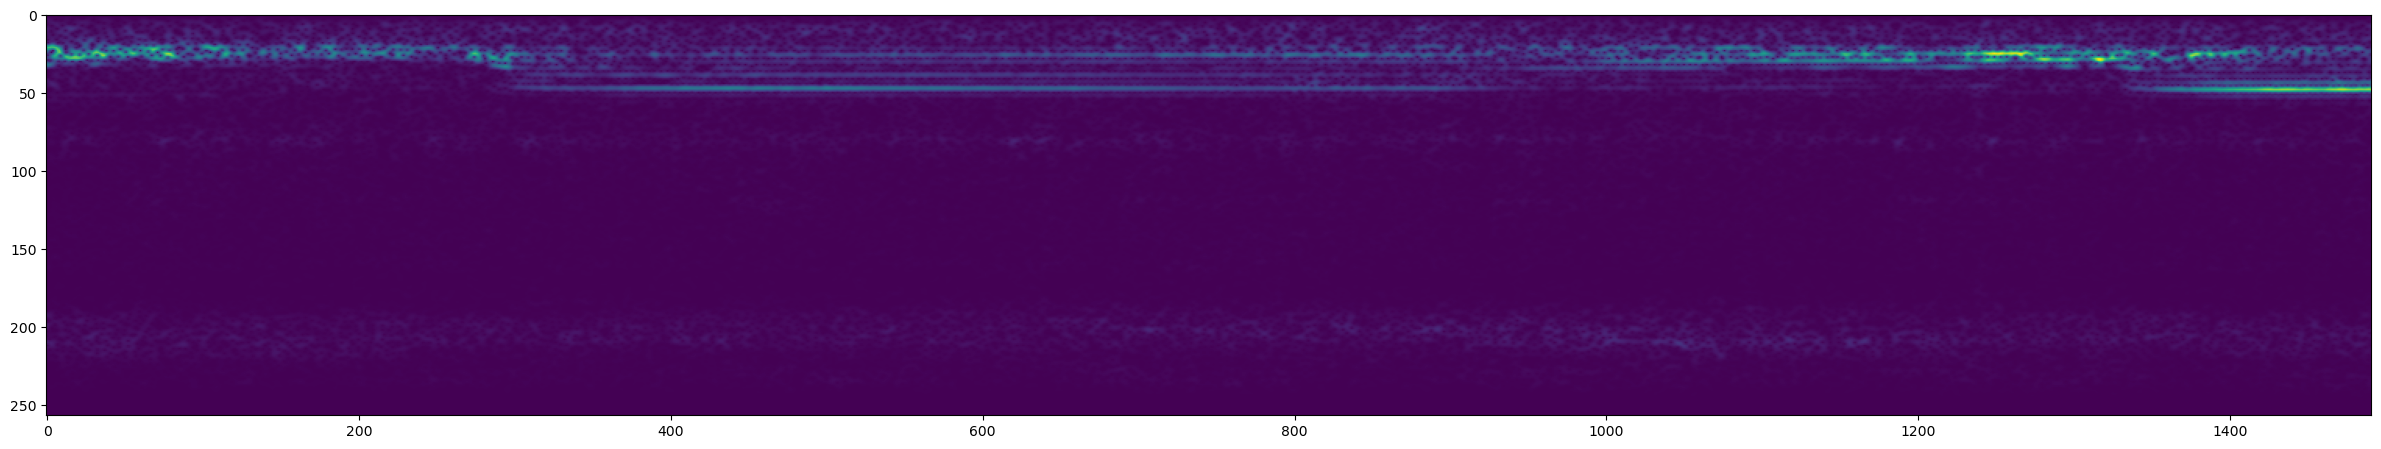

In [22]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectogram)[0])
plt.show()

In [23]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [24]:
len(data)

28

In [25]:
train = data.take(36)
test = data.skip(36).take(15)

In [26]:
samples, labels = train.as_numpy_iterator().next()

In [27]:
samples.shape

(16, 1491, 257, 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1489, 255, 16)     160       
                                                                 
 conv2d_3 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten_1 (Flatten)         (None, 6019376)           0         
                                                                 
 dense_2 (Dense)             (None, 128)               770480256 
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(train, epochs=4,validation_data=test)

Epoch 1/4


In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
yhat = model.predict(X_test)

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join('data', 'Forest Recordings', 'recording_00.mp3')

In [ ]:
wav = load_mp3_16k_mono(mp3)

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [ ]:
from itertools import groupby

In [ ]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

In [ ]:
results = {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH = os.path.join('data','Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

In [ ]:
results

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

In [ ]:
import csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])